In [69]:
# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd
import numpy as np
import scipy
from scipy.spatial.distance import euclidean, cityblock, cosine
import sklearn.metrics.pairwise

# Import matplotlib for 3d plotting:
import matplotlib.pyplot as plt

# Make matplotlib work in jupyter notebook
%matplotlib inline

In [70]:
# This function will allow us to find the average distance between two sets of data
def avg_distance(X1, X2, distance_func):
    from sklearn.metrics import jaccard_score
    #print(distance_func)
    res = 0
    for x1 in X1:
        for x2 in X2:
            if distance_func == jaccard_score: # the jaccard_score function only returns jaccard_similarity
                res += 1 - distance_func(x1, x2)
            else:
                res += distance_func(x1, x2)
    return res / (len(X1) * len(X2))

In [71]:
# This function will allow us to find the average pairwise distance
def avg_pairwise_distance(X1, X2, distance_func):
    return sum(map(distance_func, X1, X2)) / min(len(X1), len(X2))

In [72]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [73]:
df.drop(['petal_width'], axis=1, inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,species
0,5.1,3.5,1.4,setosa
1,4.9,3.0,1.4,setosa
2,4.7,3.2,1.3,setosa
3,4.6,3.1,1.5,setosa
4,5.0,3.6,1.4,setosa


In [74]:
species = df['species'].unique()

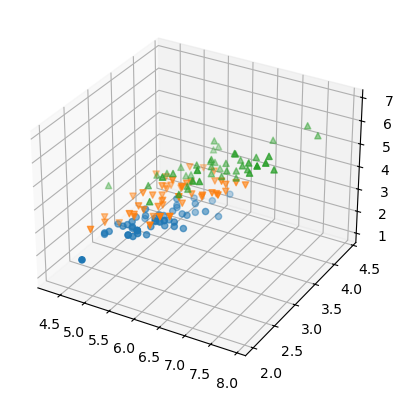

In [75]:
attrs = ['sepal_length', 'sepal_width', 'petal_length']
markers = ['o', 'v', '^']
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for specie, marker in zip(species, markers):
    specie_data = df.loc[df['species'] == specie][attrs]
    xs, ys, zs = [specie_data[attr] for attr in attrs]
    ax.scatter(xs, ys, zs, marker=marker)
plt.show()

In [76]:
euclidean([0,0], [3,4])

5.0

In [77]:
setosa_data = df.loc[df['species'] == 'setosa'][attrs].to_numpy()
versicolor_data = df.loc[df['species'] == 'versicolor'][attrs].to_numpy()
virginica_data = df.loc[df['species'] == 'virginica'][attrs].to_numpy()

In [78]:
setosa_data.shape

(50, 3)

In [79]:
avg_distance(setosa_data, versicolor_data, euclidean)


3.1110307382429827

In [80]:
avg_distance(setosa_data, virginica_data, euclidean)


4.470017704302476

In [81]:
from sklearn.metrics.pairwise import paired_euclidean_distances

In [82]:
X = np.array([[0,0]], dtype=float)
Y = np.array([[3,4]], dtype=float)

paired_euclidean_distances(X,Y).mean()

5.0

In [83]:
avg_pairwise_distance(X, Y, euclidean)


5.0

In [84]:
M, N = setosa_data.shape

print(f'{M} points and each column is {N} dimensions')


50 points and each column is 3 dimensions


In [85]:

row_dist=paired_euclidean_distances(setosa_data, versicolor_data)
row_dist

array([3.81968585, 3.44963766, 4.22018957, 2.77488739, 3.62353419,
       3.02324329, 3.71348893, 2.06155281, 3.88329757, 2.45153013,
       2.65518361, 2.85131549, 2.97321375, 4.02616443, 2.64764046,
       3.33166625, 3.33016516, 2.90172363, 3.26343377, 2.77488739,
       3.14642654, 2.83901391, 4.39431451, 3.20156212, 2.92745623,
       3.2249031 , 3.72021505, 3.84057287, 3.24037035, 2.22934968,
       2.41246762, 2.41867732, 2.84253408, 4.02367991, 3.04302481,
       3.45398321, 3.62767143, 3.318132  , 3.04630924, 2.68700577,
       3.26649659, 3.73363094, 3.1       , 2.0808652 , 2.59807621,
       2.94108823, 2.81602557, 3.32565783, 1.93132079, 2.83372546])

In [86]:

row_dist.mean()

3.1208199582684055

In [87]:
paired_euclidean_distances(setosa_data, virginica_data).mean()


4.467297089536804

In [88]:
avg_pairwise_distance(setosa_data, virginica_data, euclidean)


4.467297089536803

In [89]:
cityblock([1, 1], [-2, 2])


4

In [90]:
avg_distance(setosa_data, setosa_data, cityblock)


0.9921600000000026

In [91]:
avg_distance(setosa_data, versicolor_data, cityblock)


4.439119999999999

In [92]:
avg_distance(setosa_data, virginica_data, cityblock)


6.219039999999988

In [93]:
from sklearn.metrics.pairwise import manhattan_distances


In [94]:
X = np.array([[1, 1]])

Y = np.array([[-2, 2]])

In [95]:
manhattan_distances(X, Y)


array([[4.]])

In [96]:
df = pd.read_csv(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/auto-mpg.data',
    header=None, delim_whitespace=True,
    names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [97]:
df['car_name'] = df['car_name'].str.split(n=1).apply(lambda lst: lst[0]).replace('chevrolet', 'chevy')
df.rename(columns={'car_name': 'make'}, inplace=True)
df = df[['mpg', 'weight', 'make']]
df.head()

,mpg,weight,make
0,18.0,3504.0,chevy
1,15.0,3693.0,buick
2,18.0,3436.0,plymouth
3,16.0,3433.0,amc
4,17.0,3449.0,ford


In [98]:
dfn = df[['mpg', 'weight']]
df[['mpg', 'weight']] = (dfn-dfn.min())/(dfn.max()-dfn.min())
df.head()

,mpg,weight,make
0,0.239362,0.536150,chevy
1,0.159574,0.589736,buick
2,0.239362,0.516870,plymouth
3,0.186170,0.516019,amc
4,0.212766,0.520556,ford


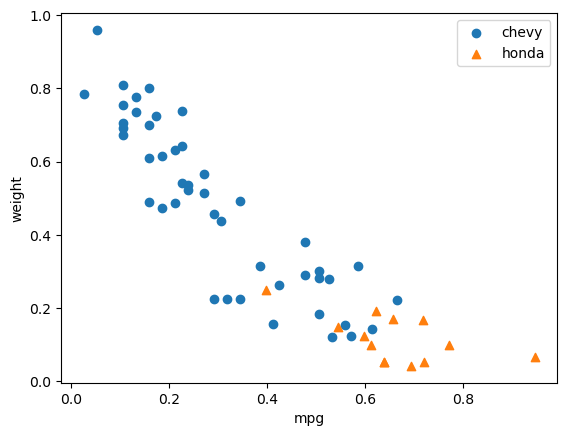

In [103]:
chevy = df.loc[df['make'] == 'chevy']
honda = df.loc[df['make'] == 'honda']

plt.scatter(chevy['mpg'], chevy['weight'], marker='o', label='chevy')
plt.scatter(honda['mpg'], honda['weight'], marker='^', label='honda')
plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()
plt.show()

In [107]:
chevy_data = chevy[['mpg', 'weight']].to_numpy()
honda_data = honda[['mpg', 'weight']].to_numpy()

In [108]:
avg_distance(chevy_data, chevy_data, cosine)


0.1686029684688174

In [109]:
avg_distance(honda_data, honda_data, cosine)


0.017557196207440316

In [110]:
avg_distance(honda_data, chevy_data, cosine)


0.3511900540950527

In [111]:
from sklearn.metrics.pairwise import cosine_distances


In [112]:
X = np.array([[1, 1]])
Y = np.array([[-1, -1]])
cosine_distances(X, Y)

array([[2.]])

In [113]:
from sklearn.metrics.pairwise import cosine_similarity
1-cosine_similarity(X,Y)

array([[2.]])

In [114]:
cosine_distances(chevy_data, chevy_data).mean()


0.1686029684688178

In [115]:
cosine_distances(honda_data, chevy_data).mean()


0.35119005409505294

In [116]:
from sklearn.cluster import DBSCAN

In [117]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/synthetic_clustering.csv')
df.head()

,x,y
0,-0.285980,1.149042
1,-0.296288,1.204223
2,-1.157672,-1.406545
3,-0.653802,-0.993525
4,1.347072,1.329942


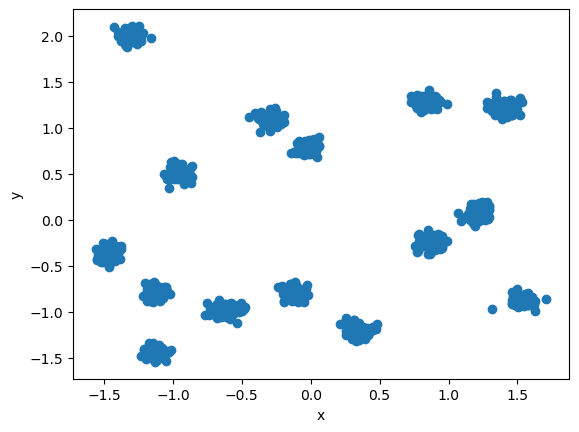

In [118]:
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [119]:
dbscan = DBSCAN(eps=0.1, metric=euclidean)
dbscan.fit(df)

DBSCAN(eps=0.1, metric=<function euclidean at 0x71c993df7f40>)

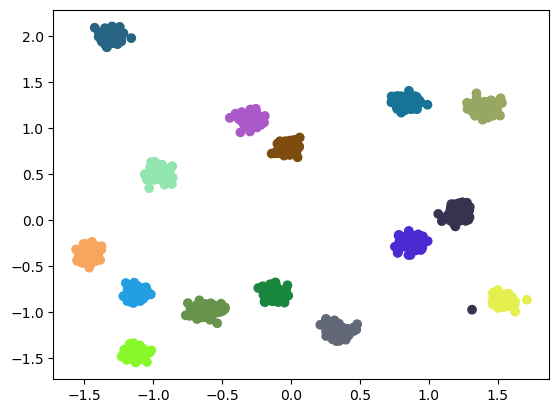

In [133]:
colors = np.random.random(size=3*(dbscan.labels_.max()+1)).reshape(-1, 3)
plt.scatter(df['x'], df['y'], c=[colors[l] for l in dbscan.labels_])
plt.show()

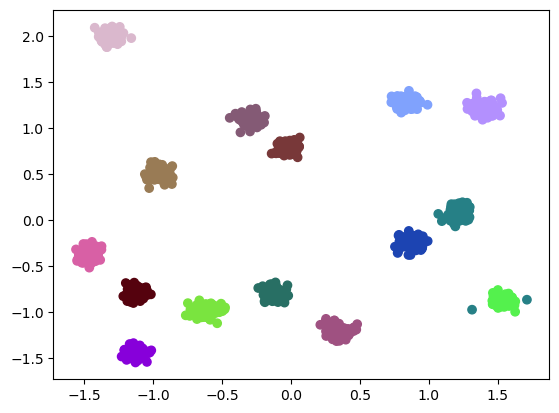

In [134]:
dbscan = DBSCAN(eps=0.1, metric=cityblock)
dbscan.fit(df)
colors = np.random.random(size=3*(dbscan.labels_.max()+1)).reshape(-1, 3)
plt.scatter(df['x'], df['y'], c=[colors[l] for l in dbscan.labels_])
plt.show()

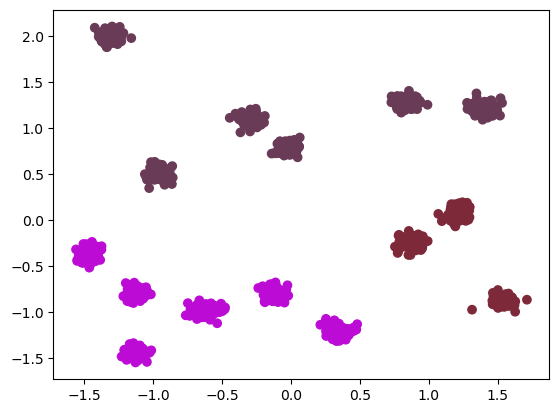

In [135]:
dbscan = DBSCAN(eps=0.1, metric=cosine)
dbscan.fit(df)
colors = np.random.random(size=3*(dbscan.labels_.max()+1)).reshape(-1, 3)
plt.scatter(df['x'], df['y'], c=[colors[l] for l in dbscan.labels_])
plt.show()

In [136]:
from sklearn.metrics import jaccard_score


In [137]:
df = pd.read_csv(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/breast-cancer.data',
    header=None,
    names=['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat'])
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [138]:
print(sorted(df['age'].unique()))
print(df.age.value_counts())

['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
age
50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: count, dtype: int64


In [139]:
from sklearn.preprocessing import OneHotEncoder


In [140]:
OH = OneHotEncoder()


In [141]:
X = OH.fit_transform(df.loc[:, df.columns != 'age']).toarray()
print(f"By using onehot encoding, we obtained a 2d array with shape {X.shape} that only has value 0 and 1 ")

By using onehot encoding, we obtained a 2d array with shape (286, 39) that only has value 0 and 1 


In [143]:
X30to39 = X[df[df.age == '30-39'].index]
X60to69 = X[df[df.age == '60-69'].index]

X30to39.shape, X60to69.shape


((36, 39), (57, 39))

In [144]:
avg_distance(X30to39, X30to39, jaccard_score)


0.6435631883548536

In [145]:
avg_distance(X60to69, X60to69, jaccard_score)


0.6182114564956281

In [146]:
avg_distance(X30to39, X60to69, jaccard_score)


0.7324778699972173

In [147]:

# Find the jaccard distance between the words in the following two sentences:
sentence1 = 'Hello everyone and welcome to distance metrics'
sentence2 = 'Hello world and welcome to distance metrics'

In [149]:
s1set = set(sentence1.split())
s2set = set(sentence2.split())

In [152]:
ans = len(s1set.intersection(s2set)) / len(s1set.union(s2set))
ans

0.75